In [248]:
!pip install fredapi 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

plt.style.use('fivethirtyeight')
pd.set_option('max_columns', 500)
color_pal = plt.rcParams['axes.prop_cycle'].by_key()['color']

from fredapi import Fred

In [249]:
fred_key = 'b81c709c80b7a6565921bad6f0ab9b2f'

# 1. Create the Fred Object

In [250]:
fred = Fred(api_key = fred_key)

# 2. Search for economic data

In [251]:
sp_search = fred.search('S&P', order_by = 'popularity')

In [252]:
sp_search.head()

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
BAMLH0A0HYM2,BAMLH0A0HYM2,2023-04-24,2023-04-24,ICE BofA US High Yield Index Option-Adjusted S...,1996-12-31,2023-04-21,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2023-04-24 09:00:01-05:00,95,The ICE BofA Option-Adjusted Spreads (OASs) ar...
CSUSHPINSA,CSUSHPINSA,2023-04-24,2023-04-24,S&P/Case-Shiller U.S. National Home Price Index,1987-01-01,2023-01-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Not Seasonally Adjusted,NSA,2023-03-30 10:39:01-05:00,91,"For more information regarding the index, plea..."
SP500,SP500,2023-04-24,2023-04-24,S&P 500,2013-04-22,2023-04-21,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2023-04-21 19:13:28-05:00,84,The observations for the S&P 500 represent the...
BAMLH0A0HYM2EY,BAMLH0A0HYM2EY,2023-04-24,2023-04-24,ICE BofA US High Yield Index Effective Yield,1996-12-31,2023-04-21,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2023-04-24 08:59:05-05:00,83,This data represents the effective yield of th...
CSUSHPISA,CSUSHPISA,2023-04-24,2023-04-24,S&P/Case-Shiller U.S. National Home Price Index,1987-01-01,2023-01-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Seasonally Adjusted,SA,2023-03-30 10:39:01-05:00,82,"For more information regarding the index, plea..."


# 3. Pull Raw Data and Plot

<AxesSubplot:title={'center':'S&P 500'}>

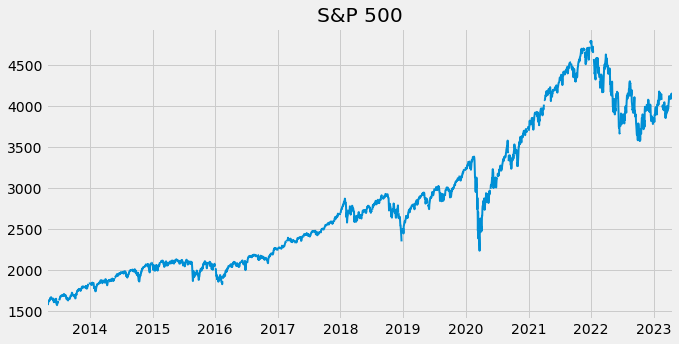

In [253]:
sp5 = fred.get_series(series_id = 'SP500')
sp5.plot(figsize = (10,5), title = 'S&P 500', lw = 2)

# 4. Pull and Join multiple data series

In [254]:
unemp_df = fred.search('unemployment state', filter = ('frequency', 'Monthly'))
unemp_df = unemp_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')
unemp_df = unemp_df.loc[unemp_df['title'].str.contains('Unemployment Rate')]
unemp_df = unemp_df[unemp_df['notes'].isnull()]

In [255]:
unemp_df

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
CAUR,CAUR,2023-04-24,2023-04-24,Unemployment Rate in California,1976-01-01,2023-02-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-03-27 16:09:02-05:00,59,None
TXUR,TXUR,2023-04-24,2023-04-24,Unemployment Rate in Texas,1976-01-01,2023-02-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-03-27 16:08:02-05:00,52,None
NYUR,NYUR,2023-04-24,2023-04-24,Unemployment Rate in New York,1976-01-01,2023-02-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-03-27 16:09:03-05:00,52,None
FLUR,FLUR,2023-04-24,2023-04-24,Unemployment Rate in Florida,1976-01-01,2023-02-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-03-27 16:09:03-05:00,51,None
OHUR,OHUR,2023-04-24,2023-04-24,Unemployment Rate in Ohio,1976-01-01,2023-02-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-03-27 16:09:04-05:00,41,None
MIUR,MIUR,2023-04-24,2023-04-24,Unemployment Rate in Michigan,1976-01-01,2023-02-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-03-27 16:09:05-05:00,37,None
PAUR,PAUR,2023-04-24,2023-04-24,Unemployment Rate in Pennsylvania,1976-01-01,2023-02-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-03-27 16:09:04-05:00,39,None
ALUR,ALUR,2023-04-24,2023-04-24,Unemployment Rate in Alabama,1976-01-01,2023-02-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-03-27 16:09:04-05:00,36,None
NJUR,NJUR,2023-04-24,2023-04-24,Unemployment Rate in New Jersey,1976-01-01,2023-02-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2023-03-27 16:09:14-05:00,22,None


In [256]:
all_results = []

for myid in unemp_df.index:
    results = fred.get_series(myid)
    results = results.to_frame(name = myid)
    all_results.append(results)

In [257]:
uemp_results = pd.concat(all_results, axis = 1)

In [258]:
not_related = ['PRUR']

for i in uemp_results.columns:
    if len(i) > 5:
        not_related.append(i)
        
uemp_results = uemp_results.drop(not_related, axis = 1)

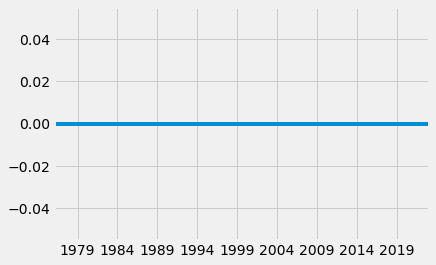

In [259]:
uemp_results.isna().sum(axis=1).plot()
uemp_states = uemp_results.dropna()
id_to_state = unemp_df['title'].str.replace('Unemployment Rate in ','').to_dict()
uemp_states.columns = [id_to_state[c] for c in uemp_states.columns]

In [260]:
# Plotting states of unemployment rate

px.line(uemp_states)

# 5. Pull May 2020 Unemployment rate per sales

<AxesSubplot:title={'center':'Unemployment rate by State, May 2020'}>

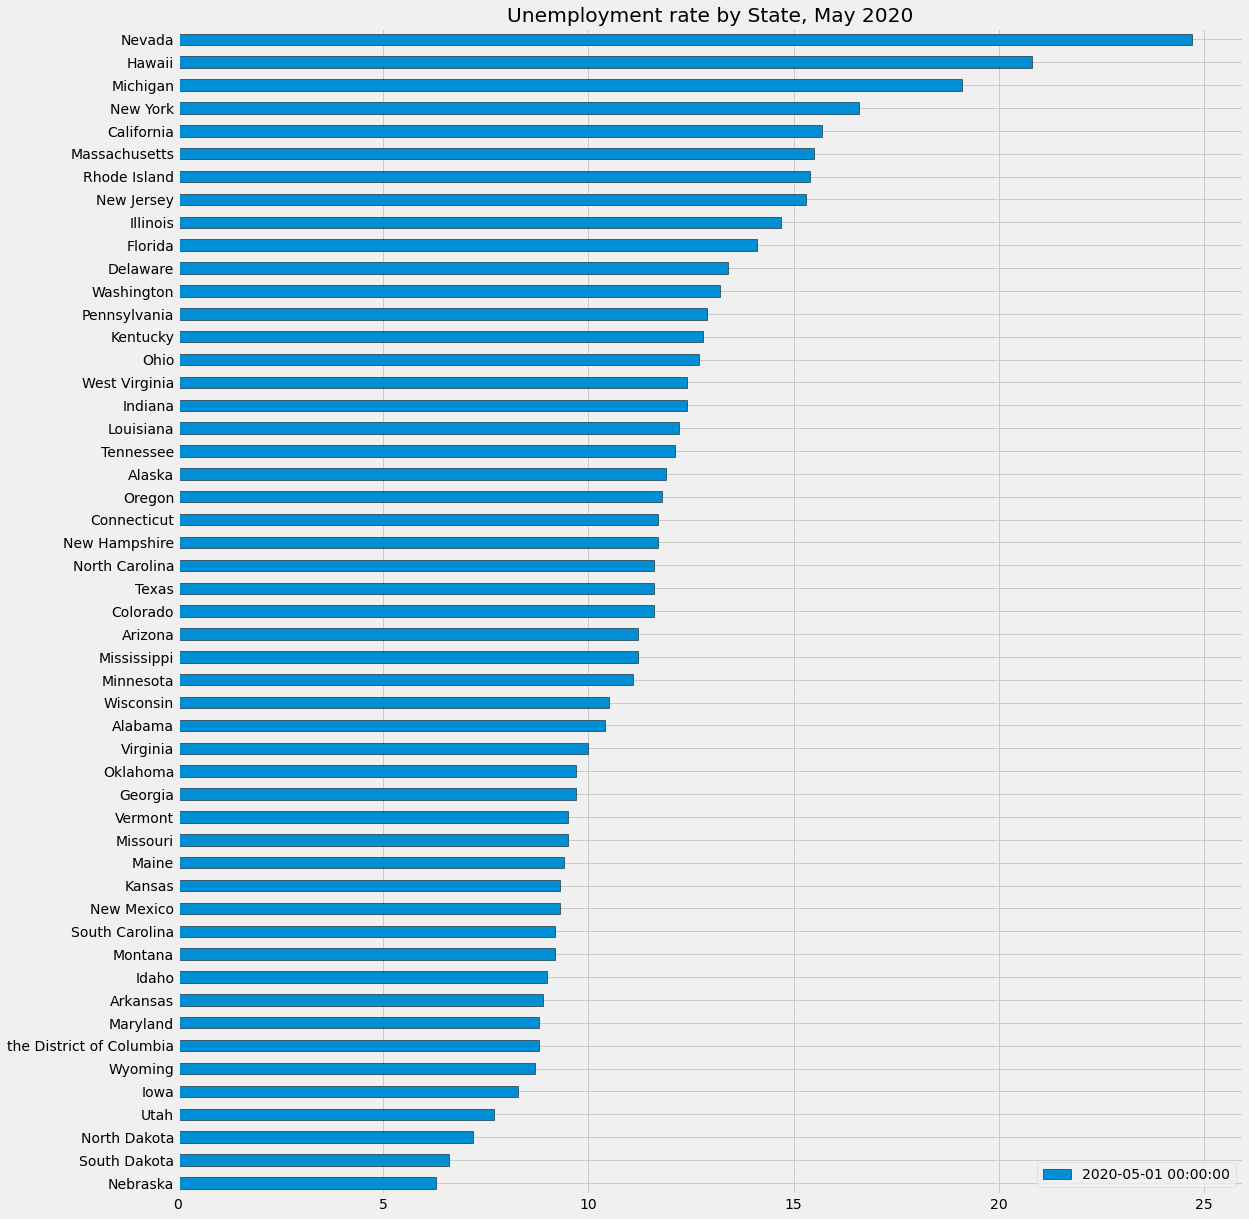

In [261]:
uemp_states[uemp_states.index == '2020-05-01'].T.sort_values('2020-05-01') \
    .plot(kind = 'barh', figsize = (17, 20), \
    title = 'Unemployment rate by State, May 2020', \
    width = 0.5, edgecolor = 'black')

<AxesSubplot:title={'center':'Unemployment rate by State, February 2020'}>

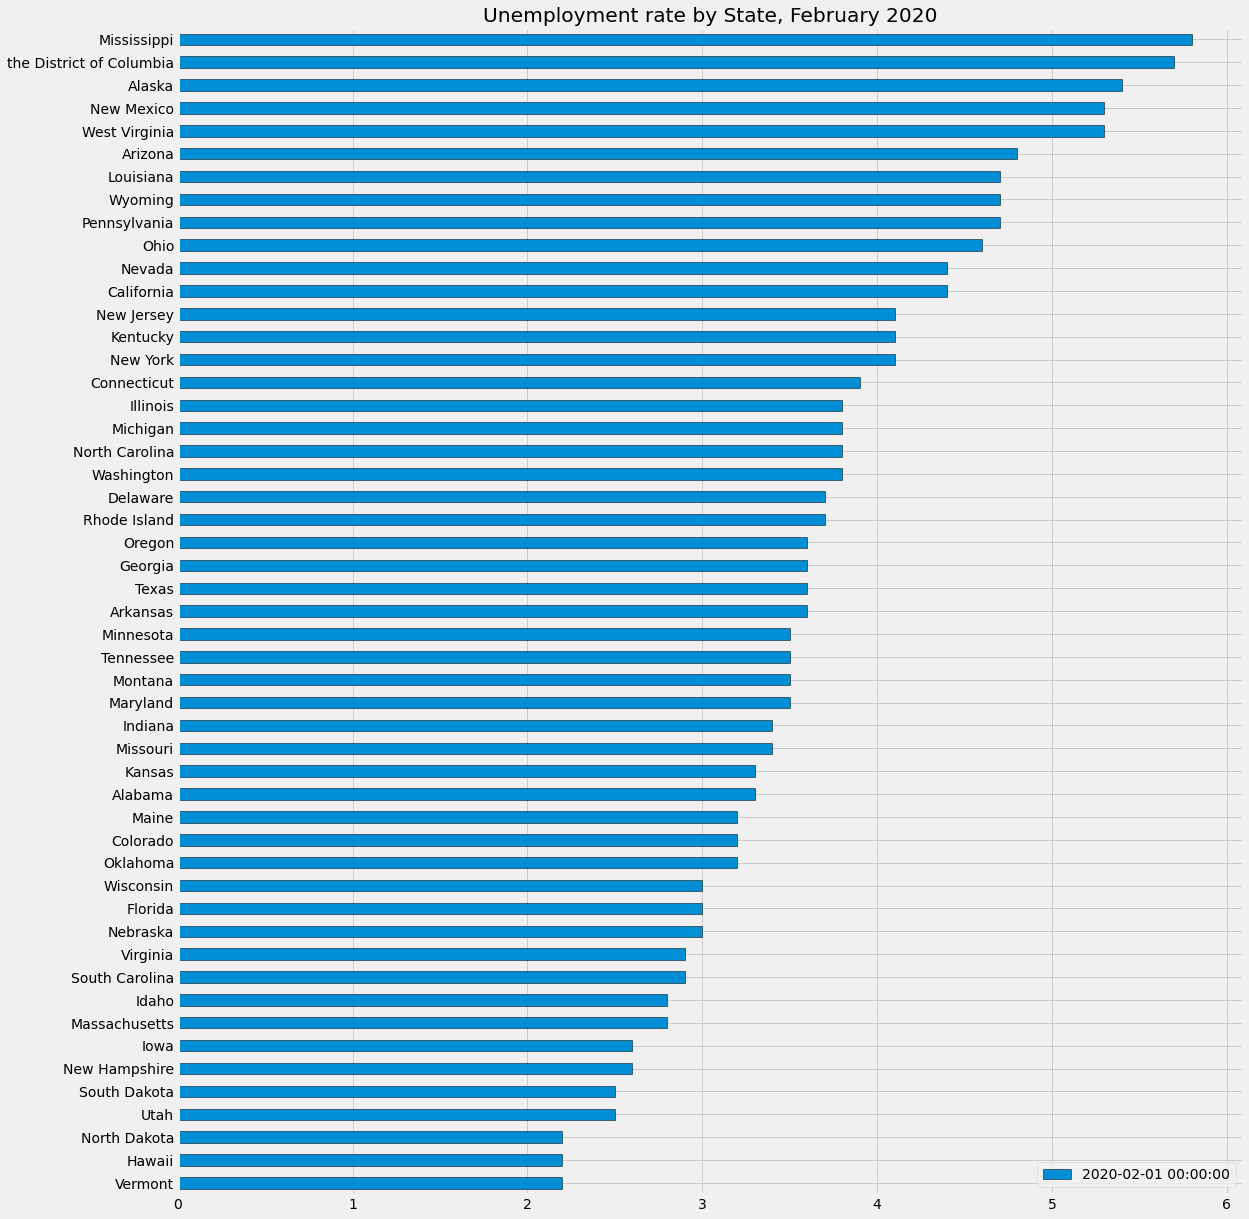

In [262]:
uemp_states[uemp_states.index == '2020-02-01'].T.sort_values('2020-02-01') \
    .plot(kind = 'barh', figsize = (17, 20), \
    title = 'Unemployment rate by State, February 2020', \
    width = 0.5, edgecolor = 'black')

# 6. Pull Particion Rate

In [263]:
part_df = fred.search('participation rate state', filter = ('frequency', 'Monthly'))
part_df = part_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')
part_df = part_df[part_df.title.str.startswith('Labor Force Participation Rate for')]

In [264]:
part_df.shape

(51, 15)

In [265]:
part_id_to_state = part_df['title'].str.replace('Labor Force Participation Rate for ','').to_dict()

all_results = []

for myid in part_df.index:
    results = fred.get_series(myid)
    results = results.to_frame(name = myid)
    all_results.append(results)

part_states = pd.concat(all_results, axis = 1)
part_states.columns = [part_id_to_state[c] for c in part_states.columns]

# 7. Plot Unemployment vs Participation

In [271]:
set(uemp_states.columns) == set(part_states.columns)

True

In [266]:
uemp_states.columns

Index(['California', 'Texas', 'New York', 'Florida', 'Ohio', 'Michigan',
       'Pennsylvania', 'Alabama', 'New Jersey', 'Illinois', 'Kentucky',
       'Colorado', 'Virginia', 'Massachusetts', 'Minnesota', 'North Carolina',
       'Wisconsin', 'Oregon', 'Utah', 'Georgia', 'Washington',
       'South Carolina', 'New Mexico', 'Alaska', 'Arkansas', 'Tennessee',
       'Indiana', 'Missouri', 'Arizona', 'West Virginia', 'Kansas', 'Iowa',
       'Oklahoma', 'Mississippi', 'Idaho', 'North Dakota', 'Nevada',
       'Louisiana', 'Maine', 'Hawaii', 'Maryland', 'New Hampshire',
       'South Dakota', 'Delaware', 'Nebraska', 'Wyoming', 'Connecticut',
       'Montana', 'the District of Columbia', 'Rhode Island', 'Vermont'],
      dtype='object')

In [267]:
part_states.columns

Index(['California', 'Florida', 'Wisconsin', 'Alabama', 'Texas', 'Minnesota',
       'New York', 'Kentucky', 'Michigan', 'North Carolina', 'Ohio', 'Maine',
       'Colorado', 'Pennsylvania', 'Illinois', 'Iowa', 'Tennessee',
       'South Carolina', 'Georgia', 'Maryland', 'Utah', 'Indiana', 'Nebraska',
       'Virginia', 'Louisiana', 'Mississippi', 'New Mexico', 'West Virginia',
       'New Jersey', 'Massachusetts', 'Oklahoma', 'Connecticut', 'Missouri',
       'Arizona', 'Oregon', 'Arkansas', 'Washington', 'Alaska', 'Montana',
       'Kansas', 'North Dakota', 'Hawaii', 'Nevada', 'Idaho', 'Delaware',
       'Vermont', 'New Hampshire', 'Wyoming', 'South Dakota', 'Rhode Island',
       'District Of Columbia'],
      dtype='object')

In [269]:
# Fixing the District of Columbia name

uemp_states = uemp_states.rename(columns = {'the District of Columbia' : 'District of Columbia'})
part_states = part_states.rename(columns = {'District Of Columbia' : 'District of Columbia'})

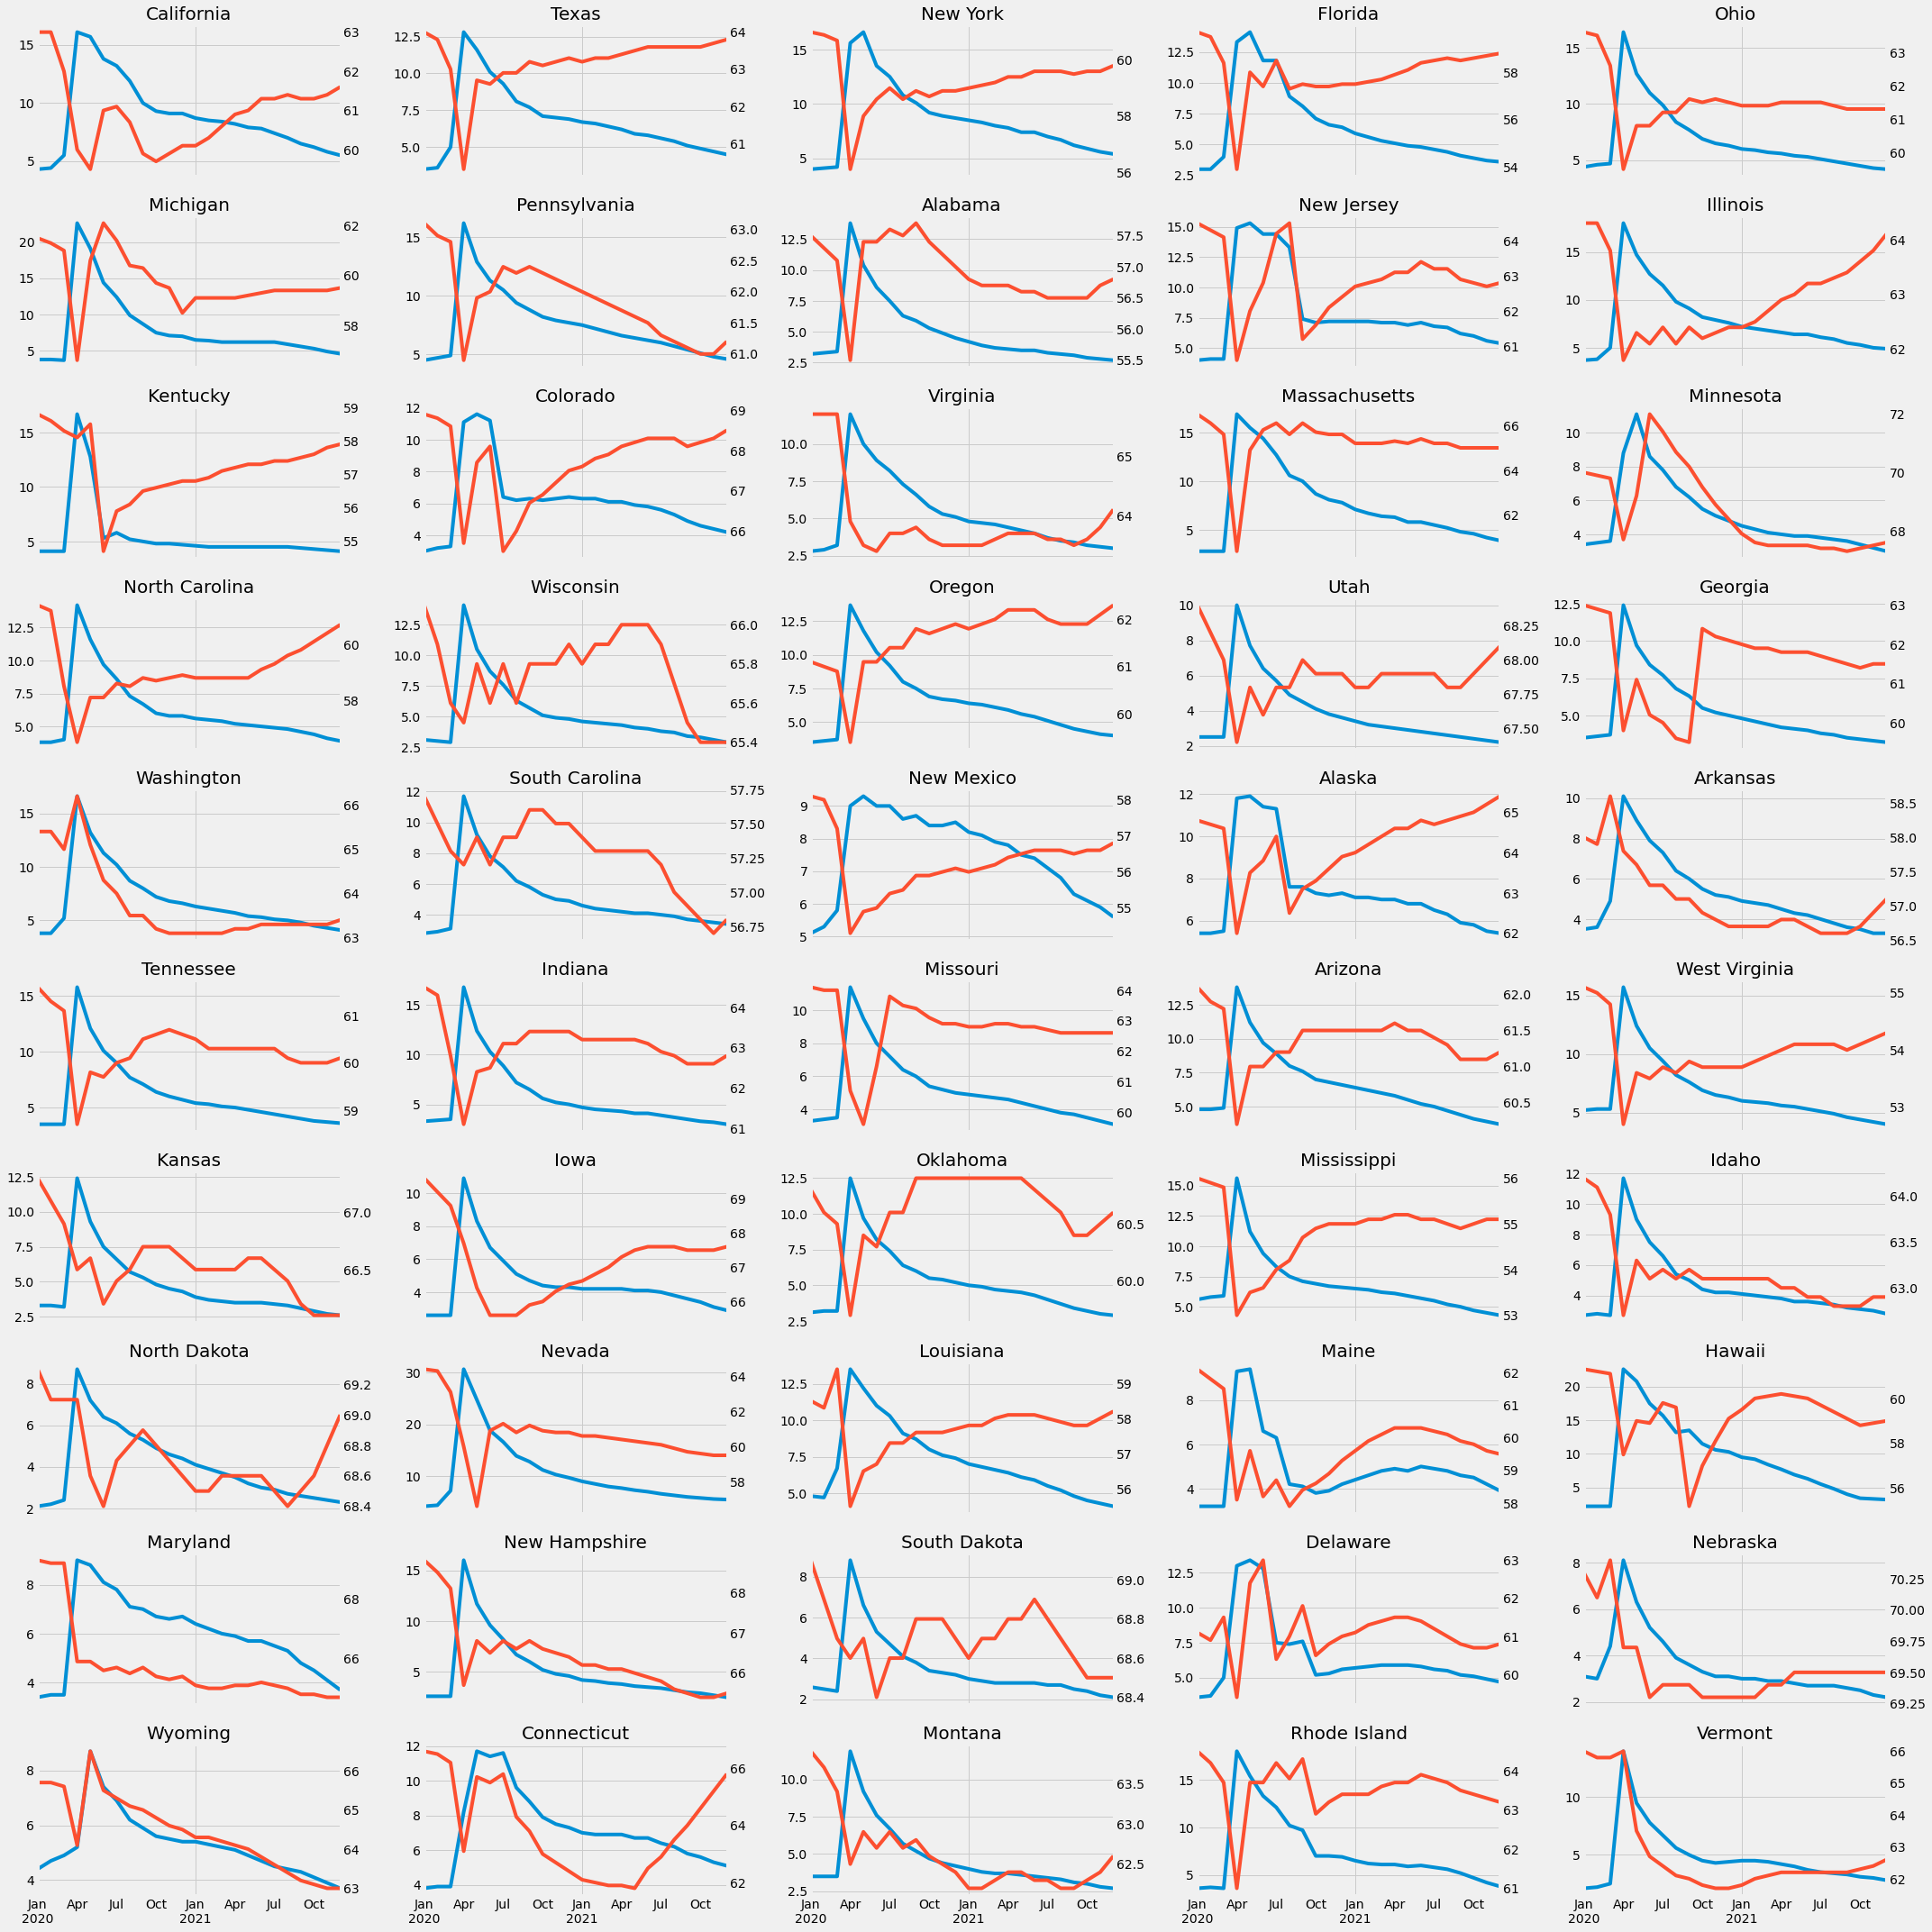

In [277]:
fig, axs = plt.subplots(10, 5, figsize = (30,30), sharex = True)
axs = axs.flatten()

i = 0
for state in uemp_states.columns:
    if state == 'District of Columbia':
        continue
    ax2 = axs[i].twinx()
    uemp_states.query('index >= 2020 and index < 2022')[state]\
        .plot(ax = axs[i], label = 'Unemployment')

    part_states.query('index >= 2020 and index < 2022')[state]\
        .plot(ax = ax2, label = 'Participation', color = color_pal[1])

    ax2.grid(False)
    axs[i].set_title(state, fontsize = 20)
    i += 1
plt.tight_layout()
plt.show()